<a href="https://colab.research.google.com/github/JossefaRodriguez/Challenge_tecnico_Core10/blob/main/Challenge_T%C3%A9cnico_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

##Parte 1: Carga y Exploración Inicial de Datos

In [4]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE10/train_titanic.csv"
df = pd.read_csv(path)

## Diccionario de variables - Dataset Titanic (Kaggle)


| Variable      | Descripción                                                  | Tipo / Valores posibles                          |
|---------------|--------------------------------------------------------------|--------------------------------------------------|
| **PassengerId** | Identificador único del pasajero                           | Numérico (entero)                                |
| **Survived**    | Supervivencia del pasajero                                 | `0` = No, `1` = Sí                               |
| **Pclass**      | Clase del billete                                           | `1` = 1ª clase, `2` = 2ª clase, `3` = 3ª clase    |
| **Name**        | Nombre completo del pasajero                               | Texto                                            |
| **Sex**         | Sexo biológico                                              | `male`, `female`                                 |
| **Age**         | Edad en años                                                | Numérico (puede contener valores nulos)          |
| **SibSp**       | Nº de hermanos/cónyuges a bordo                             | Numérico                                         |
| **Parch**       | Nº de padres/hijos a bordo                                  | Numérico                                         |
| **Ticket**      | Número o código del billete                                 | Texto / Alfanumérico                             |
| **Fare**        | Tarifa pagada por el billete                                | Numérico                                         |
| **Cabin**       | Número de cabina asignada                                   | Texto (muchos valores nulos)                     |
| **Embarked**    | Puerto de embarque                                          | `C` = Cherburgo, `Q` = Queenstown, `S` = Southampton |


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Se toma una muestra del dataset para ver comportamiento
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Se toma muestra aleatoria
df.sample(20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S


##Parte 2: Análisis Exploratorio de Datos (EDA)

In [11]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0


In [12]:
# Podemos identificar al menos tres variables con valores NaN las cuales son edad, cabina y embarque

# Comenzaremos con embarque ya que solo resta imputar dos valores los cuales se hara por la moda

# Se obtiene la moda
moda_embarque = df['embarked'].mode()[0]

# Se remplazan los valores faltantes por la moda
df['embarked'].fillna(moda_embarque, inplace=True)

/tmp/ipython-input-12-4223438443.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(moda_embarque, inplace=True)


In [13]:
df['embarked'].isna().sum()

np.int64(0)

In [14]:
# Continuamos con la variable cabina que cuenta con gran cantidad de valores Nan, por lo que se determina crear una nueva clase dentro que será la indeterminada, a fin de no crear sesgos ni valores falsos

# Imputar valores faltantes en 'cabin' como "Indeterminado"
df['cabin'] = df['cabin'].fillna('Indeterminado')

In [15]:
# Se confirma
df['cabin'].isna().sum()

np.int64(0)

In [16]:
# Por ultimo para el caso de edad imputaremos por la mediana porque puede existir precencia de valores atipicos y la idea es no sesgar

# Se calcula la media
mediana_edad = df['age'].median()

# Se imputan los valores
df['age'] = df['age'].fillna(mediana_edad)


In [17]:
# Confirmar
df['age'].isna().sum()

np.int64(0)

In [18]:
# Se verifica como queda el datset con todos los valores imputados segun se determina por varibale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Se verifican valores duplicados
df.duplicated().sum()

np.int64(0)

In [20]:
# Se calcularan las estadisticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


####Análisis Descriptivo

La variable Age tiene una mediana de 28 años, lo que indica que la mitad de los pasajeros tiene menos de esa edad. Su rango va desde 0.42 a 80 años, lo que sugiere la presencia de pasajeros bebes y adultos mayores. La dispersión es moderada.

En Fare, la mediana es de 14.45, pero la media es mucho más alta, lo que indica una distribución sesgada por tarifas elevadas, lo que nos puede indicar valores atipicos o se asocia a las tarifas de primera clase.

Las variables sibsp y parch muestran una mediana de 0 lo que indica que la mayoría viajaba solo. Sin embargo, hay algunos casos con valores altos que podrían representar familias numerosas

Survived tiene una media de 0.38, lo que implica que aproximadamente el 38% de los pasajeros sobrevivieron.

La variable pclass tiene una media de 2.31, lo que sugiere mayor concentración en las clases económica y mediaa.

/tmp/ipython-input-21-2873333707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


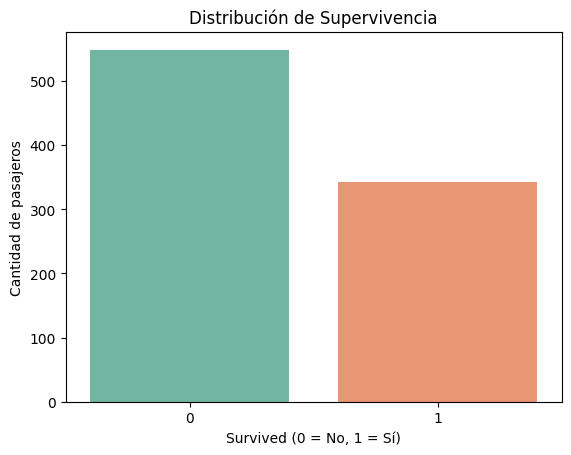

In [21]:
# Se generarán visualizacion graficas

# Hsiotgrama de la variable Survived

sns.countplot(x='survived', data=df, palette='Set2')
plt.title('Distribución de Supervivencia')
plt.xlabel('Survived (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de pasajeros')
plt.show()


El gráfico muestra la proporción de pasajeros que sobrevivieron (1) y no sobrevivieron (0). Esta visualización confirma el desequilibrio observado en el análisis descriptivo

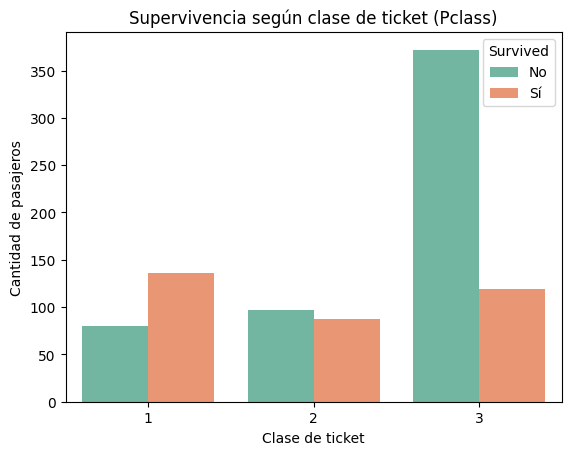

In [22]:
# Gráfico de barras agrupado de supervivencia segun clase
sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
plt.title('Supervivencia según clase de ticket (Pclass)')
plt.xlabel('Clase de ticket')
plt.ylabel('Cantidad de pasajeros')
plt.legend(title='Survived', labels=['No', 'Sí'])
plt.show()

En este grafico se puede observar como varía la supervivencia según la clase de ticket. Se observa mayor proporción de sobrevivientes en primera clase y segunda clase y menor en tercera.

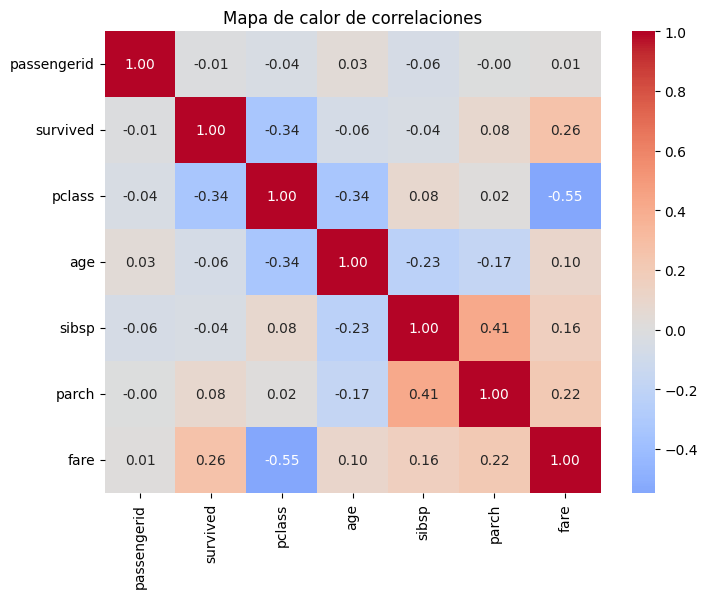

In [23]:
# Mapa de calor con correlaciones
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()


- survived tiene correlación negativa con pclass (-0.34), indicando que los pasajeros de clases más bajas sobrevivieron menos.
- fareestá positivamente correlacionado con survived (0.26) y negativamente con pclass (-0.55), lo que nos indica nuevamente que tarifas más altas se asocian a mayor probabilidad de supervivencia y clase alta.
- sibsp y parch tienen relación moderada entre sí (0.41), como era esperable al representar vínculos familiares.
- Las correlaciones con age son débiles, aunque su relación negativa con pclass (-0.34) nos podria indicar que los pasajeros de clase alta o ticket perimera clase eran mas adultos mayores.



In [24]:
# Ahora se analizarám los valores atipicos en las variables fare, age, sibsp, parch

def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]
    return outliers[[columna]]

# Visualizacion
outliers_fare = detectar_outliers(df, 'fare')
print(f'Outliers en variable Tarifa:\n{outliers_fare}')

Outliers en variable Tarifa:
         fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


/tmp/ipython-input-25-1943085288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='fare', palette='pastel')


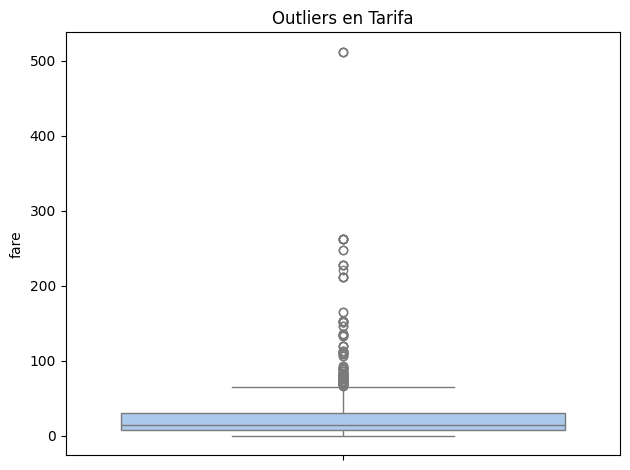

In [25]:
# Se creará un boxplot
sns.boxplot(data=df, y='fare', palette='pastel')
plt.title('Outliers en Tarifa')
plt.tight_layout()
plt.show()

In [26]:
# Seguiremos con la variable Age

def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]
    return outliers[[columna]]

# Visualizacion
outliers_age = detectar_outliers(df, 'age')
print(f'Outliers en variable Edad:\n{outliers_age}')

Outliers en variable Edad:
       age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]


/tmp/ipython-input-27-1668401536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='age', palette='pastel')


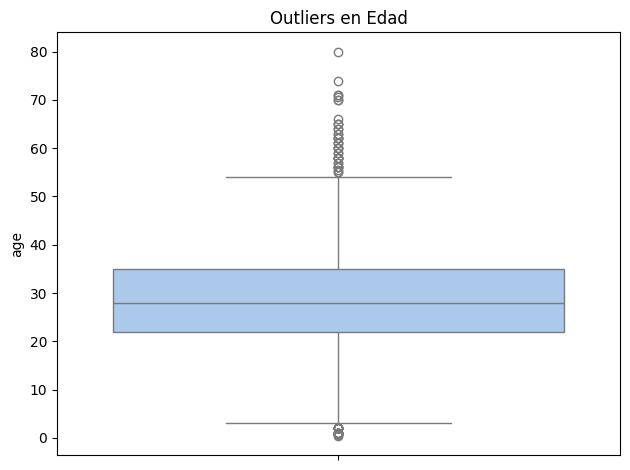

In [27]:
# Se creará un boxplot
sns.boxplot(data=df, y='age', palette='pastel')
plt.title('Outliers en Edad')
plt.tight_layout()
plt.show()

In [28]:
# continuaremos con la variable sibsp

def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]
    return outliers[[columna]]

# Visualizacion
outliers_sibsp = detectar_outliers(df, 'sibsp')
print(f'Outliers en variable Cantidad de familiares:\n{outliers_sibsp}')

Outliers en variable Cantidad de familiares:
     sibsp
7        3
16       4
24       3
27       3
50       4
59       5
63       3
68       4
71       5
85       3
88       3
119      4
159      8
164      4
171      4
176      3
180      8
182      4
201      8
229      3
233      4
261      4
266      4
278      4
324      8
341      3
374      3
386      5
409      3
480      5
485      3
541      4
542      4
634      3
642      3
683      5
686      4
726      3
787      4
792      8
813      4
819      3
824      4
846      8
850      4
863      8


/tmp/ipython-input-29-304049649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='sibsp', palette='pastel')


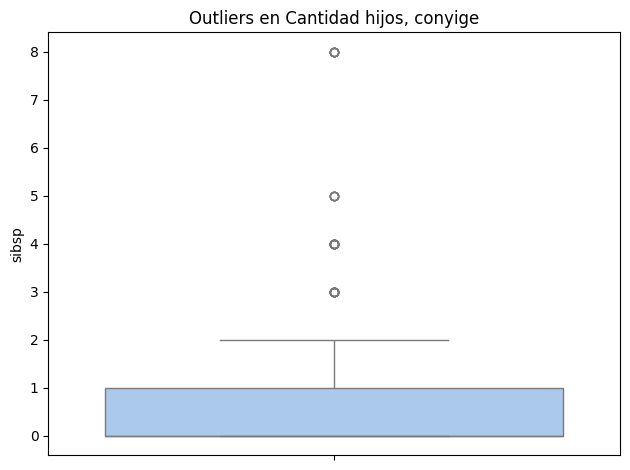

In [29]:
# Se creará un boxplot
sns.boxplot(data=df, y='sibsp', palette='pastel')
plt.title('Outliers en Cantidad hijos, conyige')
plt.tight_layout()
plt.show()

In [30]:
# Seguiremos con la variable Parch

def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lim_inf) | (df[columna] > lim_sup)]
    return outliers[[columna]]

# Visualizacion
outliers_parch = detectar_outliers(df, 'parch')
print(f'Outliers en variable Cantidad de Padres o hijos:\n{outliers_parch}')

Outliers en variable Cantidad de Padres o hijos:
     parch
7        1
8        2
10       1
13       5
16       1
..     ...
871      1
879      1
880      1
885      5
888      2

[213 rows x 1 columns]


/tmp/ipython-input-31-1247174060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='parch', palette='pastel')


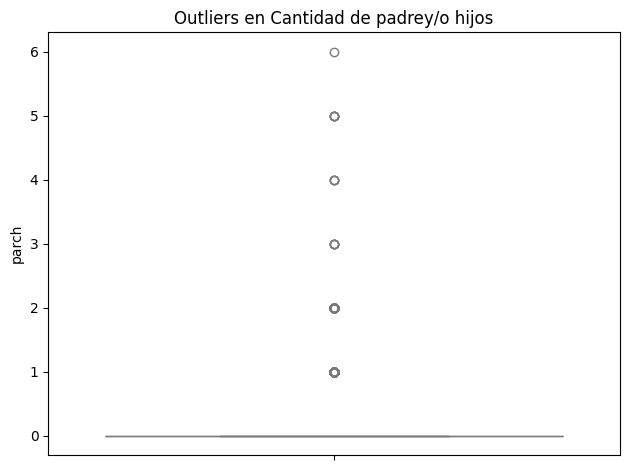

In [31]:
# Se creará un boxplot
sns.boxplot(data=df, y='parch', palette='pastel')
plt.title('Outliers en Cantidad de padrey/o hijos')
plt.tight_layout()
plt.show()

####ANalisis
- Finalizando con el analisis de los valos atipicos de las variables anteriormente mencionadas se llega a la determinación de mantener estos valores, que si bien existen algunos extremos, estos no se encuentran en un rango imposible, ni son errores mas bien son valores que pudiesen existir en algunos perfiles de pasajeros.

## Parte 3: Preprocesamiento de Datos

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# Variables predictoras se definen features y target
X = df.drop(columns=['passengerid', 'name', 'survived'])
y = df['survived']

In [34]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Definir transformadores. Separar numéricas y categóricas
num_cols = ['pclass', 'age', 'sibsp', 'parch','fare']
cat_cols = ['sex', 'ticket', 'cabin', 'embarked']

In [36]:
# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

## 5. Implementación de Modelos

###KNN

In [37]:
# Pipeline.
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

In [38]:
# Entrenar.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'ticket', 'cabin',
                                                   'embarked'])])),
                ('classifier', KNeighborsClassifier())])

In [39]:
# Predecir
y_pred = pipeline_knn.predict(X_test)

In [40]:
# Evaluar.
print("Accuracy KNN (Pipeline):", accuracy_score(y_test, y_pred))

Accuracy KNN (Pipeline): 0.8156424581005587


Se incluyen métricas adicionales (precision, recall, f1-score, matriz de confusión) para evaluar el rendimiento del modelo de forma más completa que la accuracy. Estas métricas permiten identificar si el modelo predice correctamente ambos grupos y si comete errores significativos

In [41]:
# Metricas adicionales
print(classification_report(y_test, y_pred, target_names=['No sobrevivió', 'Sobrevivió']))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

No sobrevivió       0.82      0.89      0.85       105
   Sobrevivió       0.82      0.72      0.76        74

     accuracy                           0.82       179
    macro avg       0.82      0.80      0.81       179
 weighted avg       0.82      0.82      0.81       179

Matriz de confusión:
[[93 12]
 [21 53]]


### RandomForestClassifier

In [42]:
# Pipeline.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [43]:
# Entrenar.
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'ticket', 'cabin',
                                                   'embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [44]:
# Predecir.
y_pred = pipeline_rf.predict(X_test)

In [45]:
# Evaluar.
print("Accuracy RF:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['No sobrevivió', 'Sobrevivió']))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy RF: 0.8156424581005587
               precision    recall  f1-score   support

No sobrevivió       0.80      0.91      0.85       105
   Sobrevivió       0.85      0.68      0.75        74

     accuracy                           0.82       179
    macro avg       0.82      0.79      0.80       179
 weighted avg       0.82      0.82      0.81       179

Matriz de confusión:
[[96  9]
 [24 50]]


###LogisticRegression

In [46]:
pipeline_lr = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [47]:
# Entrenar
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'ticket', 'cabin',
                                                   'embarked'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [48]:
# Predecir
y_log_pred = pipeline_lr.predict(X_test)

In [49]:
# Evaluar
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_log_pred))
print(classification_report(y_test, y_log_pred, target_names=['No sobrevivió', 'Sobrevivió']))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_log_pred))

Accuracy Logistic Regression: 0.8268156424581006
               precision    recall  f1-score   support

No sobrevivió       0.84      0.88      0.86       105
   Sobrevivió       0.81      0.76      0.78        74

     accuracy                           0.83       179
    macro avg       0.82      0.82      0.82       179
 weighted avg       0.83      0.83      0.83       179

Matriz de confusión:
[[92 13]
 [18 56]]


###XGBoost

In [50]:
# Modelo
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [51]:
# Pipeline con XGBoost
pipeline_xgb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", xgb_model)
])

In [52]:
# Entrenar
pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:23:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'ticket', 'cabin',
                                                   'embarked'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [53]:
# Predecir
y_xgb_pred = pipeline_xgb.predict(X_test)

In [54]:
# Evaluar
print("Accuracy XGBoost:", accuracy_score(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred, target_names=['No sobrevivió', 'Sobrevivió']))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_xgb_pred))

Accuracy XGBoost: 0.8212290502793296
               precision    recall  f1-score   support

No sobrevivió       0.81      0.90      0.86       105
   Sobrevivió       0.84      0.70      0.76        74

     accuracy                           0.82       179
    macro avg       0.83      0.80      0.81       179
 weighted avg       0.82      0.82      0.82       179

Matriz de confusión:
[[95 10]
 [22 52]]


### LGBM

In [55]:
# Pipeline
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),  # << Usa tu objeto existente
    ('model', LGBMClassifier(
        objective='binary',
        boosting_type='gbdt',
        n_estimators=100,
        learning_rate=0.05,
        class_weight='balanced',
        random_state=42
    ))
])

In [56]:
# Entrenamiento
pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'ticket', 'cabin',
                                                   'embarked'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                objective='binary', random_state=42))])

In [57]:
# Predicción
y_pred_lgbm = pipeline_lgbm.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [58]:
# Evaluación
print("✅ Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm, target_names=["No sobrevivió", "Sobrevivió"]))
print("📉 Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lgbm))

✅ Accuracy: 0.8156424581005587
               precision    recall  f1-score   support

No sobrevivió       0.86      0.82      0.84       105
   Sobrevivió       0.76      0.81      0.78        74

     accuracy                           0.82       179
    macro avg       0.81      0.81      0.81       179
 weighted avg       0.82      0.82      0.82       179

📉 Matriz de confusión:
 [[86 19]
 [14 60]]


####Optimización de Hiperparametros

In [60]:
# Se utilizará GridSearchCV para Optimizar Hiperparametros para el modelo KNN

# Se define el grid de los hiperparametros
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # Manhattan vs Euclideana
}

# Se aplica el GridSearchCV
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X, y)

# Se muestra resultados
print("KNN:", round(grid_knn.best_score_, 4), grid_knn.best_params_)

KNN: 0.8227 {'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}


In [61]:
# Se utilizará GridSearchCV para Optimizar Hiperparametros para el modelo RandomForest

# Se define el grid de los hiperparametros
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

# Se aplica el GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X, y)

# Se muestran resultados
print("RF:", round(grid_rf.best_score_, 4), grid_rf.best_params_)


RF: 0.8395 {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [65]:
# Se utilizará GridSearchCV para Optimizar Hiperparametros para el modelo LogisticRegression

# Se define el grid de los hiperparametros
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

# Se aplica el GridSearchCV
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X, y)

# Se muestran los resultados
print("Logistic Regression:", round(grid_lr.best_score_, 4), grid_lr.best_params_)

Logistic Regression: 0.8339 {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [64]:
# Se utilizará GridSearchCV para Optimizar Hiperparametros para el modelo XGBoost

# Se define el grid de los hiperparametros
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1]
}

# Se aplica el GridSearchCV
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X, y)

# Se muestran los resultados
print("XGBoost:", round(grid_xgb.best_score_, 4), grid_xgb.best_params_)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:32:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 0.8328 {'classifier__learning_rate': 0.01, 'classifier__max_depth': 9, 'classifier__n_estimators': 200}


In [68]:
# Se utilizará GridSearchCV para Optimizar Hiperparametros para el modelo LGBM

# Se define el grid de los hiperparametros
param_grid_lgbm = {
    'model__num_leaves': [15, 31],
    'model__max_depth': [-1, 5, 10],
    'model__learning_rate': [0.01, 0.1],
}

# Se aplica el GridSearchCV
grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgbm.fit(X, y)

# Se muestran los resultados
print("LGBM:", round(grid_lgbm.best_score_, 4), grid_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [75]:
### Comparación de Resultados

# Se crearan variables para diferenciar los modelos con sus accuracy inicial
model_base_rf = pipeline_rf.fit(X, y).score(X, y)
model_base_knn = pipeline_knn.fit(X, y).score(X, y)
model_base_xgb = pipeline_xgb.fit(X, y).score(X, y)
model_base_lgbm = pipeline_lgbm.fit(X, y).score(X, y)
model_base_lr = pipeline_lr.fit(X, y).score(X, y)

# Se crearan variables para diferenciar los modelos con sus accuracy con optimizacion (CV promedio)
model_opt_rf = grid_rf.best_score_
model_opt_knn = grid_knn.best_score_
model_opt_xgb = grid_xgb.best_score_
model_opt_lgbm = grid_lgbm.best_score_
model_opt_lr = grid_lr.best_score_

# Función que crea una tabla resumen de los resultados
df_comparacion = pd.DataFrame({
    'Modelo': ['Random Forest', 'KNN', 'XGBoost', 'LGBM', 'Logistic Regression'],
    'Accuracy Base': [model_base_rf, model_base_knn, model_base_xgb, model_base_lgbm, model_base_lr],
    'Accuracy Optimizado': [model_opt_rf, model_opt_knn, model_opt_xgb, model_opt_lgbm, model_opt_lr],
})

# Se muestra la tabla de comparacion
print("\n\nComparación modelos base con el optimizado optimizados\n")
print(df_comparacion.round(4))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:46:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Comparación modelos base con el optimizado optimizados

                Modelo  Accuracy Base  Accuracy Optimizado
0        Random Forest         0.9978               0.8395
1                  KNN         0.8664             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


###Analisis
Se observó que los modelos con mayor accuracy en entrenamiento (como Random Forest con 99%) estaban sobreajustados. La otpmizacion en este caso tuvo una caida en el resultado. por otra parte los otors modelos como logistic regression Xgboost se mantuvieron mas consistentes, con esto se concluye la importancia de la optimización ya que en algunos casos algunos modelos pueden estar sobreajustados y la baja en estos casos nos estaria indicando una medicion quizas mas realista.